# Investigate a Dataset

Uses Titanic Dataset.


### Quality of Analysis


**Question:** How did fares differ between men and women?

### Data Wrangling Phase



In [193]:
import numpy as np
import pandas as pd

data = pd.read_csv('titanic_data.csv')

# Remove crew
orig_len = len(data)
data = data[data.Fare != 0]

# Remove any missing vals
pre_len = len(data)
fares = data[pd.notnull(data['Fare'])]
post_len = len(fares)

print "Original Length: %i" % orig_len
print "Passenger Length: %i" % pre_len
print "There were no missing fare values:\npre_len == post_len:",  pre_len == post_len




Original Length: 891
Passenger Length: 876
There were no missing fare values:
pre_len == post_len: True


### Exploration Phase

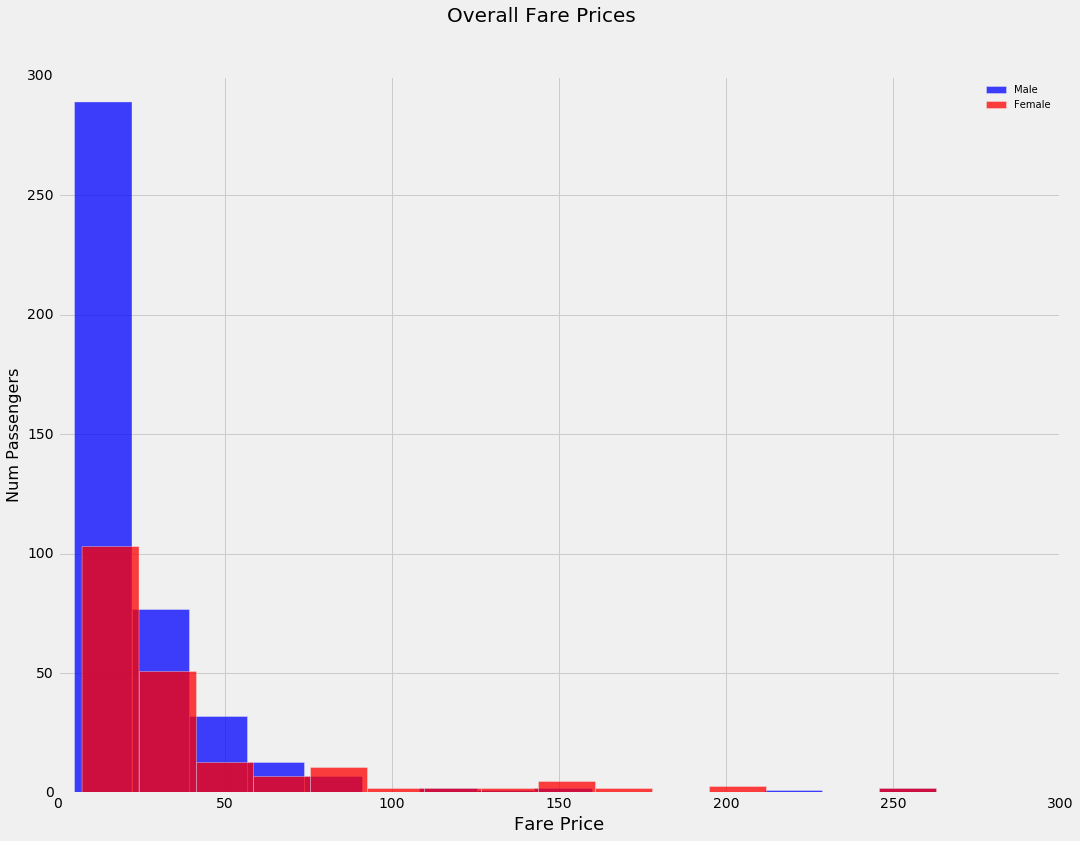

Mean male fare: 26.205136
Mean female fare: 44.479818


In [148]:
bins = 15
fig = plt.figure(1, figsize=(16, 12))
plt.style.use('fivethirtyeight')

plt.hist(s[s.Sex == 'male'].Fare, bins, facecolor='blue', alpha=0.75, label='Male')
plt.hist(s[s.Sex == 'female'].Fare, bins, facecolor='red', alpha=0.75, label='Female')
plt.legend(prop={'size': 10})

fig.suptitle('Overall Fare Prices', fontsize=20)
plt.xlabel('Fare Price', fontsize=18)
plt.ylabel('Num Passengers', fontsize=16)
plt.show()

print "Mean male fare: %f" % fares[fares.Sex == 'male'].Fare.mean()
print "Mean female fare: %f" % fares[fares.Sex == 'female'].Fare.mean()

This show a comparison of overall fare prices between men and women. The average fare price is higher for women in this dataset. This could be caused by the female outliers in the 100-250 range.

For both men and women, fare prices are positively skewed.

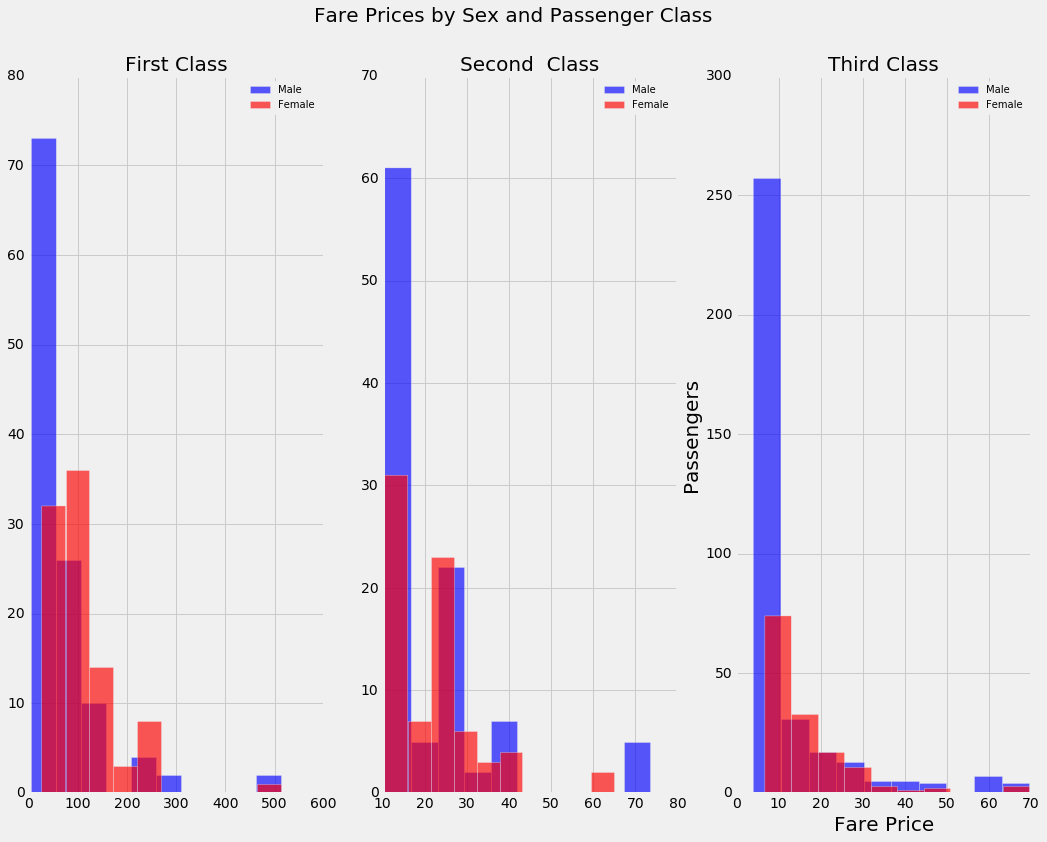

Mean first class male fare: 70.099038
Mean first class female fare: 106.125798
Mean second class male fare: 20.903064
Mean second classfemale fare: 21.970121
Mean third class male fare: 12.809290
Mean third class female fare: 16.118810


In [146]:
# dfs of passenger
p1 = fares[fares.Pclass == 1]
p2 = fares[fares.Pclass == 2]
p3 = fares[fares.Pclass == 3]

n_bins = 25

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 12))
ax0, ax1, ax2 = axes.flat
fig.subplots_adjust(top=0.9)


fig.suptitle('Fare Prices by Sex and Passenger Class', fontsize=20)
plt.xlabel('Fare Price', fontsize=20)
plt.ylabel('Passengers', fontsize=20)

ax0.hist(p1[p1.Sex == 'male'].Fare, bins, facecolor='blue', alpha=0.65, label='Male')
ax0.hist(p1[p1.Sex == 'female'].Fare, bins, facecolor='red', alpha=0.65, label='Female')
ax0.legend(prop={'size': 10})
ax0.set_title('First Class', fontsize=20)

ax1.hist(p2[p2.Sex == 'male'].Fare, bins, facecolor='blue', alpha=0.65, label='Male')
ax1.hist(p2[p2.Sex == 'female'].Fare, bins, facecolor='red', alpha=0.65, label='Female')
ax1.legend(prop={'size': 10})
ax1.set_title('Second  Class', fontsize=20)

ax2.hist(p3[p3.Sex == 'male'].Fare, bins, facecolor='blue', alpha=0.65, label='Male')
ax2.hist(p3[p3.Sex == 'female'].Fare, bins, facecolor='red', alpha=0.65, label='Female')
ax2.legend(prop={'size': 10})
ax2.set_title('Third Class', fontsize=20)

plt.show()

# fare by pclass & sex means
print "Mean first class male fare: %f" % p1[p1.Sex == 'male'].Fare.mean()
print "Mean first class female fare: %f" % p1[p1.Sex == 'female'].Fare.mean()

print "Mean second class male fare: %f" % p2[p2.Sex == 'male'].Fare.mean()
print "Mean second classfemale fare: %f" % p2[p2.Sex == 'female'].Fare.mean()

print "Mean third class male fare: %f" % p3[p3.Sex == 'male'].Fare.mean()
print "Mean third class female fare: %f" % p3[p3.Sex == 'female'].Fare.mean()



This shows that average fare prices are higher for women across all passenger classes. However, the biggest difference in fare prices comes in first class, followed by third class.

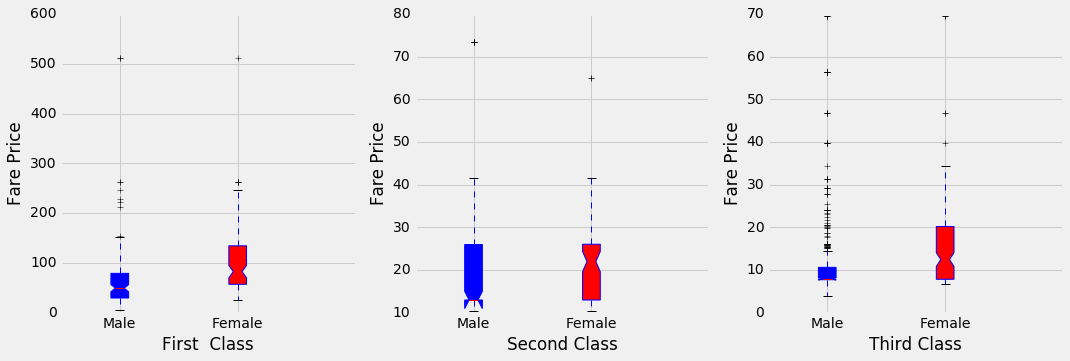

In [184]:
# Followed: http://matplotlib.org/examples/statistics/boxplot_color_demo.html

# setup vars
class_labels = ['Third Class', 'Second Class', 'First  Class']
p1_m = np.array(p1[p1.Sex == 'male'].Fare)
p1_f = np.array(p1[p1.Sex == 'female'].Fare)
p2_m = np.array(p2[p2.Sex == 'male'].Fare)
p2_f = np.array(p2[p2.Sex == 'female'].Fare)
p3_m = np.array(p3[p3.Sex == 'male'].Fare)
p3_f = np.array(p3[p3.Sex == 'female'].Fare)

p1_combined = [p1_m, p1_f]
p2_combined = [p2_m, p2_f]
p3_combined = [p3_m, p3_f]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
bplot1 = axes[0].boxplot(p1_combined,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

bplot2 = axes[1].boxplot(p2_combined,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

bplot3 = axes[2].boxplot(p3_combined,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color


# fill with colors
colors = ['blue', 'red']
for bplot in (bplot1, bplot2, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(p1_combined))], )
    ax.set_ylabel('Fare Price')
    ax.set_xlabel(class_labels.pop())

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['Male', 'Female'])

plt.show()



This shows the breakdown by sex and passenger class. Once again this shows that mean fare prices are higher for women. However, it also shows variance and skew. Looking at the female fare for second and third classes, it seems that there were larger upper third class and lower second class groups. This could explain why the price differences between men and women were the largest in the order of first, third, and second classes.

### Conclusions & Communication Phase

Above I examine the relationship between passenger sex, their class, and the fare that they paid. In conclusion, I found that women did pay more for their tickets and that this is true in all passenger classes.

Note: This is purely a descriptive analysis and the findings are tentative.
